<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230310.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Cusotmer Analysis 
* Iteartors

In [4]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import seaborn as sns
import matplotlib.pyplot as plt 
from datetime import datetime, date, time, timezone, timedelta
import re
import os
from functools import reduce
from collections import defaultdict
from scipy import stats
from scipy.stats import norm

# Customer Analysis

In [5]:
os.listdir()

['.config',
 'online_retail.xlsx',
 'ab_experiment.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'groceries.csv',
 'test.csv',
 '1_customers_dataset.csv',
 'sales_vs_discount.csv',
 'sales_data_with_stores.csv',
 'app_wau.csv',
 '1_orders_dataset.csv',
 'online_retail_II.xlsx',
 'cookie_cats.csv',
 '1_order_payments_dataset.csv',
 'sales.csv',
 'lead_conversion.csv',
 'match_result_test.csv',
 'bz_data_analyis.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'mall_customers.csv',
 'sample-sales-data.csv',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'ecommerce-data.csv',
 'mock_sales_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'scanner_data.csv',
 'sample_data']

In [10]:
df = pd.read_csv('bz_data_analyis.csv')
df.head()

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.


,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,12/30/19 00:01,0,1,1
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,12/29/19 07:03,7,3,1
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,12/12/19 18:21,18,21,1
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,12/22/19 15:13,15,13,1
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,12/18/19 12:38,12,38,1


In [11]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['date'] = df['order_date'].to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,2019-12-30
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,2019-12-23
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,2019-12-09
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,2019-12-16
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,2019-12-16


In [18]:
df['cat'] = df['product'].str.split().str[-1]
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week,cat
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,2019-12-30,Laptop
1,295666,LG Washing Machine,3,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,2019-12-23,Machine
2,295667,USB-C Charging Cable,3,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,2019-12-09,Cable
3,295668,27in FHD Monitor,2,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,2019-12-16,Monitor
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,2019-12-16,Cable


In [54]:
flag = df['quantity_ordered'].str.contains(r'[A-Za-z]')
flag

0         False
1         False
2         False
3         False
4         False
          ...  
185945      NaN
185946      NaN
185947      NaN
185948      NaN
185949      NaN
Name: quantity_ordered, Length: 185950, dtype: object

In [48]:
flag = df['quantity_ordered'].str.contains(r'[A-Za-z]').reset_index(name = 'res')
row_num = flag[flag['res'] != False]['index']
df.loc[row_num]

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week,cat
1242,296854,Bose SoundSport Headphones,1+C1273,99.99,"588 West St, San Francisco, CA 94016",12,2019,14,San Francisco (CA),CA,99.99,2019-12-14 00:51:00,0,51,1,2019-12-14,2019-12-09,Headphones
65536,171873,20in Monitor,1,109.99,"937 Forest St, Los Angeles, CA 90001",3,2019,2,Los Angeles (CA),CA,109.99,2019-03-02 20:52:00,20,52,1,2019-03-02,2019-02-25,Monitor
65537,171874,AA Batteries (4-pack),1,3.84,"438 Pine St, Boston, MA 02215",3,2019,24,Boston (MA),MA,3.84,2019-03-24 11:27:00,11,27,1,2019-03-24,2019-03-18,(4-pack)
65538,171875,USB-C Charging Cable,1,11.95,"697 9th St, San Francisco, CA 94016",3,2019,10,San Francisco (CA),CA,11.95,2019-03-10 12:51:00,12,51,1,2019-03-10,2019-03-04,Cable
65539,171876,Lightning Charging Cable,1,14.95,"760 2nd St, San Francisco, CA 94016",3,2019,14,San Francisco (CA),CA,14.95,2019-03-14 15:43:00,15,43,1,2019-03-14,2019-03-11,Cable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185945,222905,AAA Batteries (4-pack),1,2.99,"795 Pine St, Boston, MA 02215",6,2019,7,Boston (MA),MA,2.99,2019-06-07 19:02:00,19,2,1,2019-06-07,2019-06-03,(4-pack)
185946,222906,27in FHD Monitor,1,149.99,"495 North St, New York City, NY 10001",6,2019,1,New York City (NY),NY,149.99,2019-06-01 19:29:00,19,29,1,2019-06-01,2019-05-27,Monitor
185947,222907,USB-C Charging Cable,1,11.95,"319 Ridge St, San Francisco, CA 94016",6,2019,22,San Francisco (CA),CA,11.95,2019-06-22 18:57:00,18,57,1,2019-06-22,2019-06-17,Cable
185948,222908,USB-C Charging Cable,1,11.95,"916 Main St, San Francisco, CA 94016",6,2019,26,San Francisco (CA),CA,11.95,2019-06-26 18:35:00,18,35,1,2019-06-26,2019-06-24,Cable


In [72]:
df['quantity_ordered'] = pd.to_numeric(df['quantity_ordered'], errors='coerce')
df = df.fillna(1)
df['rev'] = df['quantity_ordered'] * df['price_each']

In [76]:
df.head()

,customer_id,product,quantity_ordered,price_each,purchase_address,month,year,day,city,code,sales,order_date,hour,minute,count,date,week,cat,rev
0,295665,Macbook Pro Laptop,1.0,1700.00,"136 Church St, New York City, NY 10001",12,2019,30,New York City (NY),NY,1700.00,2019-12-30 00:01:00,0,1,1,2019-12-30,2019-12-30,Laptop,1700.00
1,295666,LG Washing Machine,3.0,600.00,"562 2nd St, New York City, NY 10001",12,2019,29,New York City (NY),NY,600.00,2019-12-29 07:03:00,7,3,1,2019-12-29,2019-12-23,Machine,1800.00
2,295667,USB-C Charging Cable,3.0,11.95,"277 Main St, New York City, NY 10001",12,2019,12,New York City (NY),NY,11.95,2019-12-12 18:21:00,18,21,1,2019-12-12,2019-12-09,Cable,35.85
3,295668,27in FHD Monitor,2.0,149.99,"410 6th St, San Francisco, CA 94016",12,2019,22,San Francisco (CA),CA,149.99,2019-12-22 15:13:00,15,13,1,2019-12-22,2019-12-16,Monitor,299.98
4,295669,USB-C Charging Cable,1.0,11.95,"43 Hill St, Atlanta, GA 30301",12,2019,18,Atlanta (GA),GA,11.95,2019-12-18 12:38:00,12,38,1,2019-12-18,2019-12-16,Cable,11.95


In [77]:
cnt = df.groupby(['week', 'cat'])['customer_id','rev'].agg({'customer_id':'count','rev':'sum'}).reset_index().rename(columns = {'customer_id':'cnt','rev':'rev'})
cnt.head()

<ipython-input-77-a60c13143e5c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


,week,cat,cnt,rev
0,2018-12-31,(4-pack),382,1836.07
1,2018-12-31,Cable,437,6509.70
2,2018-12-31,Dryer,11,6600.00
3,2018-12-31,Headphones,448,36772.83
4,2018-12-31,Laptop,86,114699.55


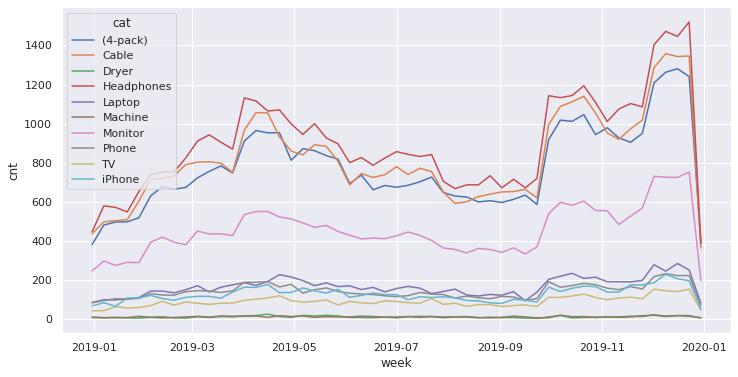

In [78]:
sns.set(rc = {'figure.figsize':[12,6]})
sns.lineplot(data = cnt, x = 'week', y = 'cnt', hue = 'cat')
plt.show()

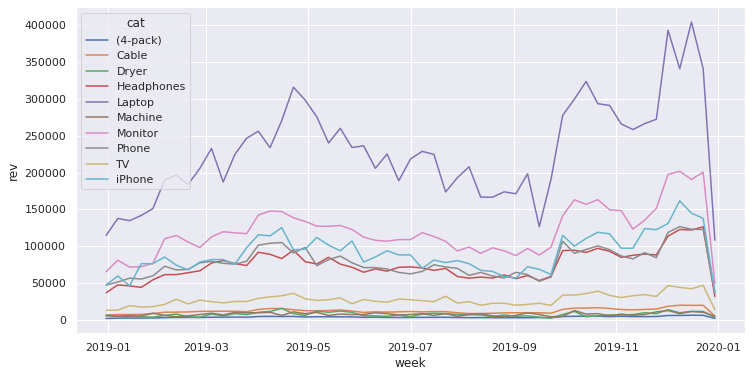

In [79]:
sns.lineplot(data = cnt, x = 'week', y = 'rev', hue = 'cat')
plt.show()

# Iterators

In [80]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [83]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [82]:
{k: [user[k] for user in users] for k in users[0].keys()}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}